In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [30]:
income = pd.read_csv('income_data.csv')
income.head()
# plt.figure(figsize=(12,15))
# plt.scatter(income['Age'],income['Salary($)'])

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


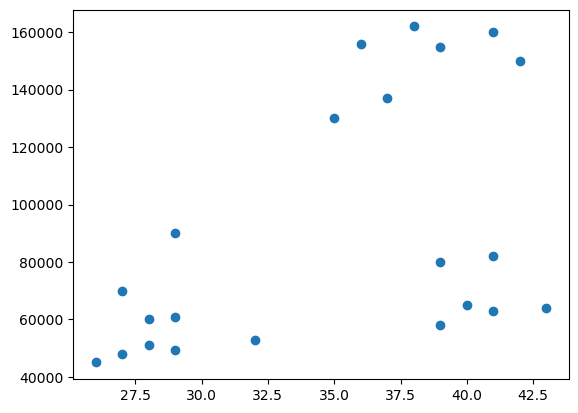

In [16]:
plt.scatter(income['Age'], income['Income($)'])
plt.show()

In [31]:
km = KMeans(n_clusters=3)
predicted_cluster = km.fit_predict(income[['Age','Income($)']])
predicted_cluster

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [32]:
income['cluster'] = predicted_cluster
income.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

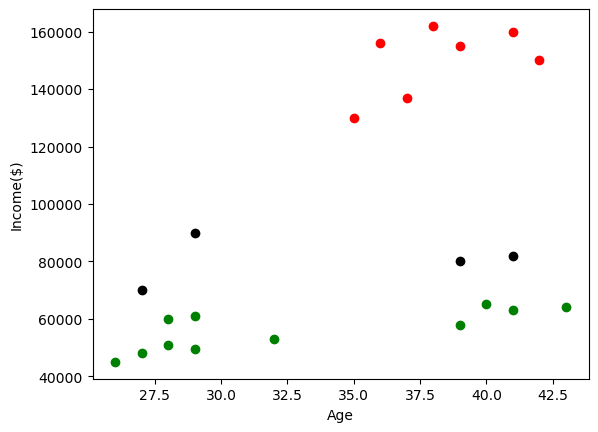

In [34]:
df1 = income[income.cluster==0]
df2 = income[income.cluster==1]
df3 = income[income.cluster==2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')


In [41]:
scaler = MinMaxScaler() # will make scale between 0 and 1
scaler.fit(income[['Income($)']])
income['Income($)']=scaler.transform(income[['Income($)']])

scaler.fit(income[['Age']])
income['Age']=scaler.transform(income[['Age']])
income.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

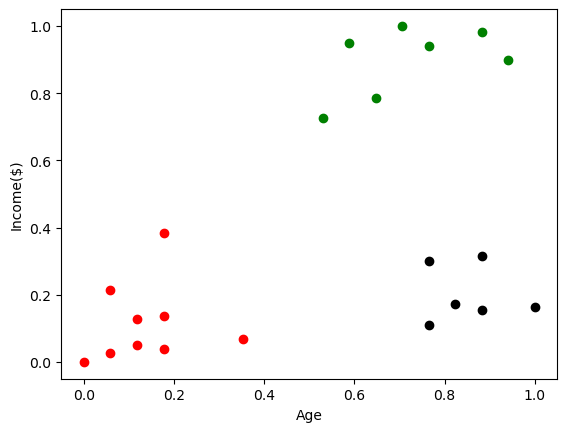

In [42]:
km = KMeans(n_clusters=3) #Initialise the algorithm
predicted_cluster = km.fit_predict(income[['Age','Income($)']])
income['cluster'] = predicted_cluster
df1 = income[income.cluster==0]
df2 = income[income.cluster==1]
df3 = income[income.cluster==2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')


Text(0, 0.5, 'Income($)')

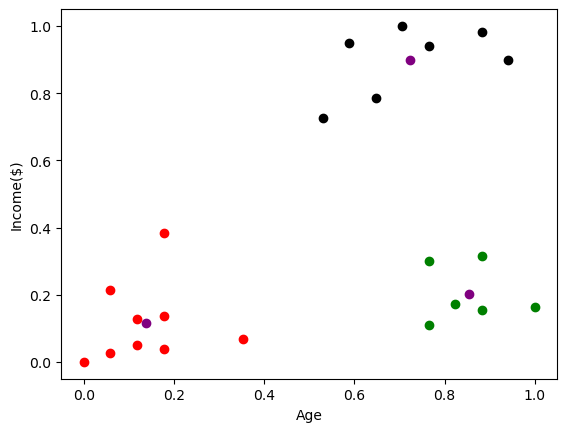

In [45]:
centroid_loc = km.cluster_centers_
km = KMeans(n_clusters=3) #Initialise the algorithm
predicted_cluster = km.fit_predict(income[['Age','Income($)']])
income['cluster'] = predicted_cluster
df1 = income[income.cluster==0]
df2 = income[income.cluster==1]
df3 = income[income.cluster==2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.scatter(centroid_loc[:,0], centroid_loc[:,1], color = 'purple')
plt.xlabel('Age')
plt.ylabel('Income($)')


C:\Users\sfine\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


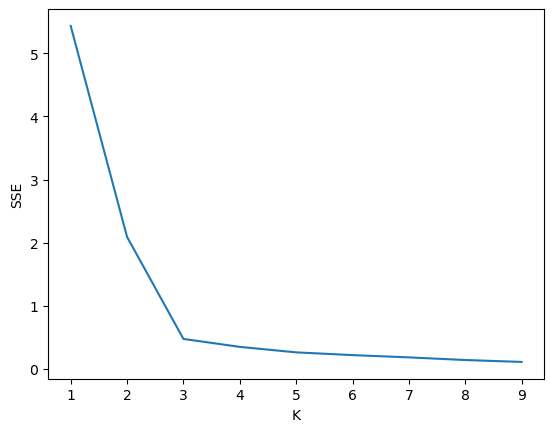

In [46]:
k_range = range(1,10)
sse=[]
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(income[['Age','Income($)']])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

In [54]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


C:\Users\sfine\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


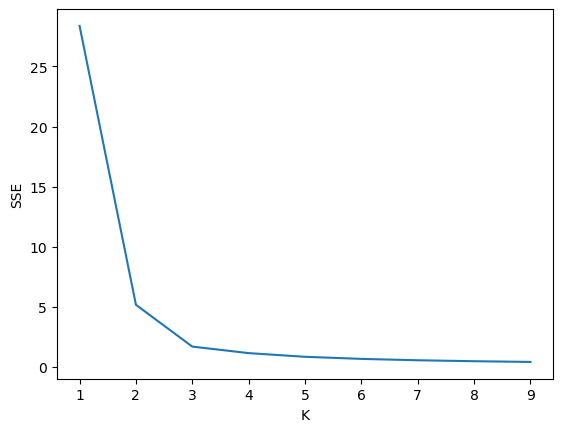

In [63]:
k_range = range(1,10)
sse=[]
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)
plt.show()

Text(0, 0.5, 'petal width (cm)')

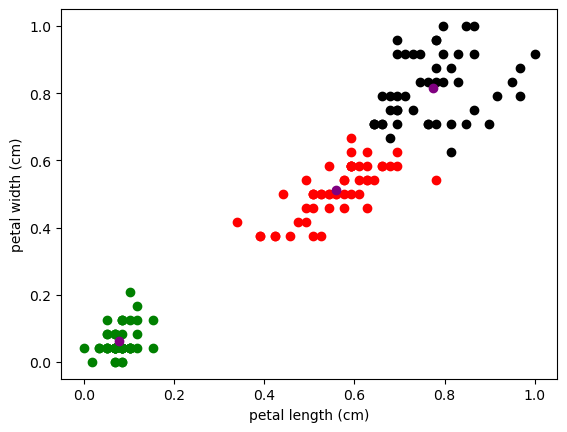

In [65]:
scaler = MinMaxScaler() # will make scale between 0 and 1
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

km=KMeans(n_clusters=3)
clusters = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
centroid_loc = km.cluster_centers_
df['cluster'] = clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black')
plt.scatter(centroid_loc[:,0], centroid_loc[:,1], color = 'purple')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')